This file generates figures for Model I.  

Set SLIDES=True for larger fontsizes and linewidths appropriate for slides.  Set SLIDES=False for normal fontsizes and linewidths appropriate for the paper.

Created by Kerry Back
July, 2024

In [1]:
import pandas as pd 
import numpy as np
from core.core import *
from core.model1 import Stage1

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')
colors = sns.color_palette()

SLIDES = False

mpl.rcParams['font.size'] = 10 + 2*SLIDES
mpl.rcParams['axes.titlesize'] = 14 + 2*SLIDES
mpl.rcParams['axes.labelsize'] = 12 + 2*SLIDES
mpl.rcParams['xtick.labelsize'] = 10 + 2*SLIDES
mpl.rcParams['ytick.labelsize'] = 10 + 2*SLIDES
mpl.rcParams['legend.fontsize'] = 10 + 2*SLIDES
mpl.rcParams['legend.title_fontsize'] = 0
mpl.rcParams['figure.figsize'] = (8, 4)
FigureDir = "Slides" if SLIDES else "../Figures"
linewidth = 3 if SLIDES else 1

mu = 103
mustar = 100
sigma = sig = 20
lam = 1000
rsquared = 0.2
rho = 0.5
m = Stage1(
    mu=mu, 
    mustar=mustar, 
    sigma=sigma, 
    rho=rho,
    lam=lam, 
    rsquared=rsquared
)

c:\Users\skazempour\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


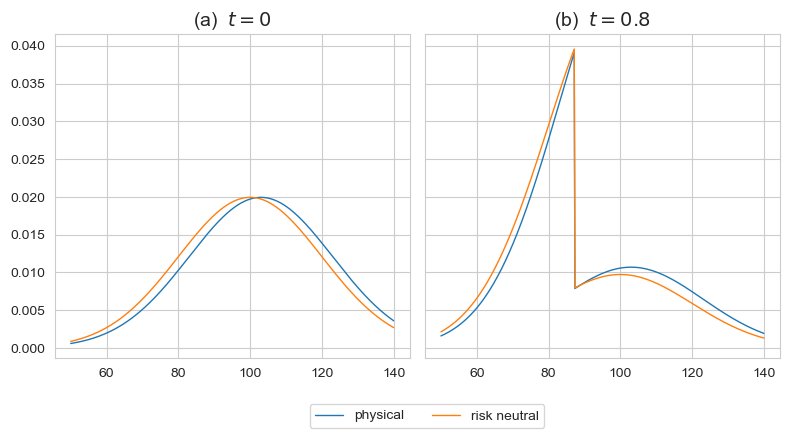

In [2]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
grid = np.linspace(50, 140, 500)

t = 0
ax1.plot(
    grid, 
    [m.density(t, x) for x in grid], 
    label="physical", 
    lw=linewidth
)
ax1.plot(
    grid, 
    [m.rn_density(t, x) for x in grid], 
    label="risk neutral", 
    lw=linewidth
)
ax1.set_title(r'(a) $\;t=0$')

t = 0.8
ax2.plot(
    grid, 
    [m.density(t, x) for x in grid], 
    lw=linewidth
)
ax2.plot(
    grid, 
    [m.rn_density(t, x) for x in grid], 
    lw=linewidth
)
ax2.set_title(r'(b) $\;t=0.8$')

fig.legend(bbox_to_anchor=(0.54, -0.1), loc='lower center', ncol=2)
fig.tight_layout()  
fig.savefig(f'{FigureDir}/model1_densities.pdf', bbox_inches='tight')

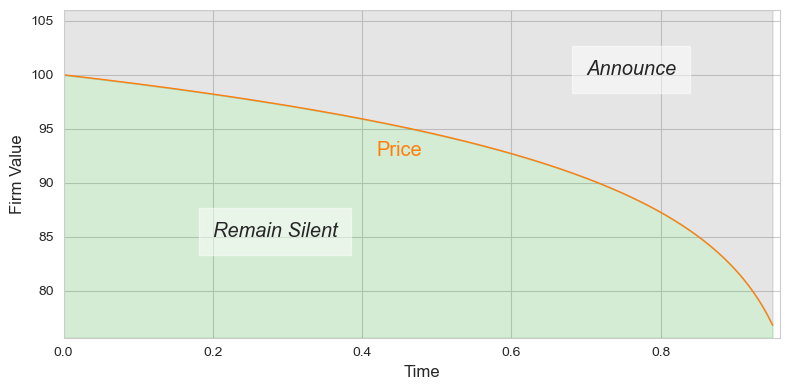

In [11]:
grid = np.linspace(0, 0.95, 1000)
pr = np.array([m.price1(t) for t in grid])

fig, ax = plt.subplots()
ax.plot(grid, pr, lw=linewidth, c=colors[1], label="Price")


y0, y1 = ax.get_ylim()
ax.set_ylim((y0, 106))
ax.fill_between(
    grid, pr, 106,
    color=colors[7], 
    alpha=0.2,
)
ax.fill_between(
    grid, y0, pr,
    color=colors[2], 
    alpha=0.2,
)
ax.set_xlabel("Time")
ax.set_ylabel("Firm Value")
ax.set_xlim((0, 0.96))

ax.text(
    0.7, 100, "Announce", size="x-large", style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}
)

ax.text(0.2, 85, "Remain Silent", size="x-large", style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

#ax.legend(loc="lower center")
ax.text(0.42, 92.5, "Price", size="x-large", color=colors[1])
fig.tight_layout()  
fig.savefig(f'{FigureDir}/model1_equilibrium.pdf', bbox_inches='tight')

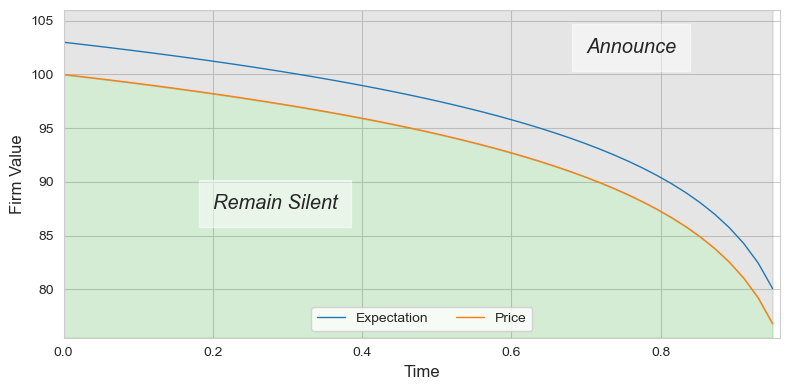

In [7]:
grid = np.linspace(0, 0.95, 50)
means = [m.mean1(t) for t in grid]
prices = [m.price1(t) for t in grid]

fig, ax = plt.subplots()

ax.plot(
    grid, 
    means,
    lw=linewidth, 
    c=colors[0], 
    label="Expectation"
)

ax.plot(
    grid,
    prices, 
    lw=linewidth, 
    c=colors[1], 
    label="Price"
)

y0, y1 = ax.get_ylim()
ax.set_ylim((y0, 106))
ax.fill_between(
    grid, prices, 106,
    color=colors[7], 
    alpha=0.2,
)
ax.fill_between(
    grid, y0, prices,
    color=colors[2], 
    alpha=0.2,
)
ax.set_xlabel("Time")
ax.set_ylabel("Firm Value")
ax.set_xlim((0, 0.96))

ax.text(0.7, 102, "Announce", size="x-large", style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

ax.text(0.2, 87.5, "Remain Silent", size="x-large", style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

ax.legend(loc="lower center", ncols=2)
fig.tight_layout()  
fig.savefig(f'{FigureDir}/model1_mean.pdf', bbox_inches='tight')

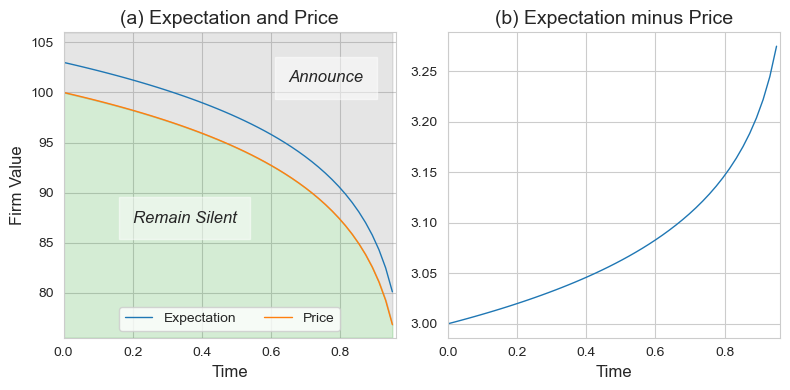

In [13]:
grid = np.linspace(0, 0.95, 50)
means = [m.mean1(t) for t in grid]
prices = [m.price1(t) for t in grid]
rprem = np.array(means) - np.array(prices)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

ax1.plot(grid, means, lw=linewidth, c=colors[0], label="Expectation")
ax1.plot(grid, prices, lw=linewidth, c=colors[1], label="Price")

y0, y1 = ax1.get_ylim()
ax1.set_ylim((y0, 106))
ax1.fill_between(
    grid, prices, 106,
    color=colors[7], 
    alpha=0.2,
)
ax1.fill_between(
    grid, y0, prices,
    color=colors[2], 
    alpha=0.2,
)
ax1.set_xlabel("Time")
ax1.set_ylabel("Firm Value")
ax1.set_xlim((0, 0.96))

ax1.text(0.65, 101, "Announce", size="large", style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

ax1.text(0.2, 87, "Remain Silent", size="large", style='italic',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

ax1.legend(loc="lower center", ncols=2)
panel1_title = "Expectation and Price" if SLIDES else "(a) Expectation and Price"
panel2_title = "Expectation minus Price" if SLIDES else "(b) Expectation minus Price"
ax1.set_title(panel1_title)
ax2.set_title(panel2_title)

ax2.plot(grid, rprem, color=colors[0], lw=linewidth)

ax2.set_xlabel("Time")
ax2.set_xlim((0, 0.96))

fig.tight_layout()  
fig.savefig(f'{FigureDir}/model1_riskpremium.pdf', bbox_inches='tight')

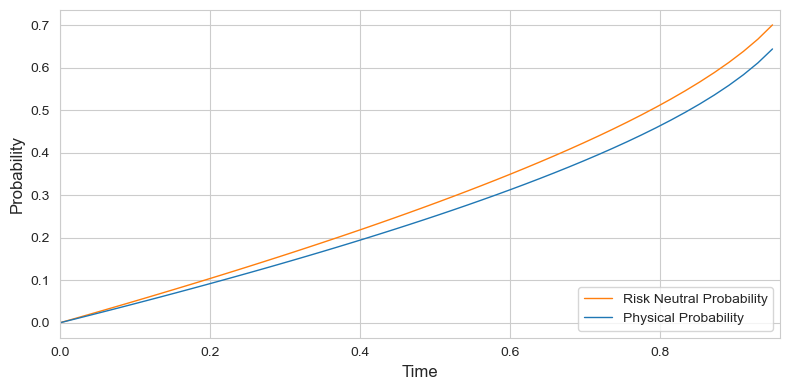

In [9]:
grid = np.linspace(0, 0.95, 50)
pr = [m.price1(t) for t in grid]

physical = [m.probs(t)[1] for t in grid]
rneutral = [m.rn_probs(t)[1] for t in grid]

fig, ax = plt.subplots()

ax.plot(grid, rneutral, lw=linewidth, c=colors[1], label="Risk Neutral Probability")
ax.plot(grid, physical, lw=linewidth, c=colors[0], label="Physical Probability")

ax.set_xlabel("Time")
ax.set_ylabel("Probability")
ax.set_xlim((0, 0.96))

ax.legend(loc="lower right")
fig.tight_layout()  
fig.savefig(f'{FigureDir}/model1_paranoia.pdf', bbox_inches='tight')